# Task 1.1 Exploratory Data Analysis (English)

## EDA on English dataset

In [1]:
from datasets import load_dataset
import pandas as pd

ds_fingpt = load_dataset("FinGPT/fingpt-sentiment-train")

print(ds_fingpt)
print(ds_fingpt["train"].features)
print(ds_fingpt["train"][0])

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 76772
    })
})
{'input': Value(dtype='string', id=None), 'output': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None)}
{'input': 'Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Korea Hydro & Nuclear Power Co. .', 'output': 'neutral', 'instruction': 'What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.'}


In [2]:
# Some basic analysis
## total number of samples
print("Total # of samples:", len(ds_fingpt["train"]))
print("-" * 20)

## unique input counts
output_counts_fingpt = pd.Series(ds_fingpt["train"]["output"]).value_counts()
print("Output counts:")
print(output_counts_fingpt)
print("-" * 20)

## unique instruction counts
instr_counts_fingpt = pd.Series(ds_fingpt["train"]["instruction"]).value_counts()
print("Instruction counts:")
print(instr_counts_fingpt)
print("-" * 20)

## duplicates and missing outputs
df_fingpt = pd.DataFrame(ds_fingpt["train"])
print("English duplicates:", df_fingpt.duplicated(subset="input").sum())
print("English missing outputs:", df_fingpt["output"].isna().sum())
print("-" * 20)


Total # of samples: 76772
--------------------
Output counts:
neutral                29215
positive               21588
negative               11749
moderately positive     6163
moderately negative     2972
mildly positive         2548
mildly negative         2108
strong negative          218
strong positive          211
Name: count, dtype: int64
--------------------
Instruction counts:
What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.                                                                                         30699
What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.                                                                                          29889
What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.    16184
Name: count, dtype: int64
-----------------

In [3]:
# remove duplicates
df_fingpt = df_fingpt.drop_duplicates(subset="input")
# remove missing outputs
df_fingpt = df_fingpt.dropna(subset=["output"])

#check data after cleaning
print("After cleaning:")
print("Total # of samples:", len(df_fingpt))
print("English duplicates:", df_fingpt.duplicated(subset="input").sum(), df_fingpt.duplicated(subset="instruction").sum(), df_fingpt.duplicated(subset="output").sum())
print("English missing outputs:", df_fingpt["output"].isna().sum(), df_fingpt["instruction"].isna().sum(), df_fingpt["input"].isna().sum())

## unique input counts updated
output_counts_fingpt = pd.Series(df_fingpt["output"]).value_counts()
print("Output counts:")
print(output_counts_fingpt)
print("-" * 20)

## unique instruction counts updateds
instr_counts_fingpt = pd.Series(df_fingpt["instruction"]).value_counts()
print("Instruction counts:")
print(instr_counts_fingpt)
print("-" * 20)


After cleaning:
Total # of samples: 30235
English duplicates: 0 30232 30226
English missing outputs: 0 0 0
Output counts:
output
neutral                10362
moderately positive     6163
positive                3484
moderately negative     2972
mildly positive         2548
negative                2169
mildly negative         2108
strong negative          218
strong positive          211
Name: count, dtype: int64
--------------------
Instruction counts:
instruction
What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.    16184
What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.                                                                                         10068
What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.                                                            

In [4]:

# map the 7 outputs to 3 classes
sentiment_mapping_fingpt = {
    'strong negative': 'negative',
    'moderately negative': 'negative',
    'mildly negative': 'negative',
    'neutral': 'neutral',
    'mildly positive': 'positive',
    'moderately positive': 'positive', 
    'strong positive': 'positive',
    'positive': 'positive',
    'negative': 'negative'
}

missing_values = df_fingpt[~df_fingpt['output'].isin(sentiment_mapping_fingpt.keys())]
print("Values not in mapping dictionary:", missing_values['output'].unique())


df_fingpt['output'] = df_fingpt['output'].map(sentiment_mapping_fingpt)

## unique input counts updated
output_counts_fingpt = pd.Series(df_fingpt["output"]).value_counts()
print("Output counts:")
print(output_counts_fingpt)
print("-" * 20)


print("NaN count after mapping:", df_fingpt['output'].isna().sum())

Values not in mapping dictionary: []
Output counts:
output
positive    12406
neutral     10362
negative     7467
Name: count, dtype: int64
--------------------
NaN count after mapping: 0


Categorical summaries:
          output                                        instruction
count      30235                                              30235
unique         3                                                  3
top     positive  What is the sentiment of this news? Please cho...
freq       12406                                              16184

Text‐length descriptive statistics:
count    30235.000000
mean       135.434397
std         84.076006
min          2.000000
25%         75.000000
50%        119.000000
75%        170.000000
max       2107.000000
Name: length, dtype: float64


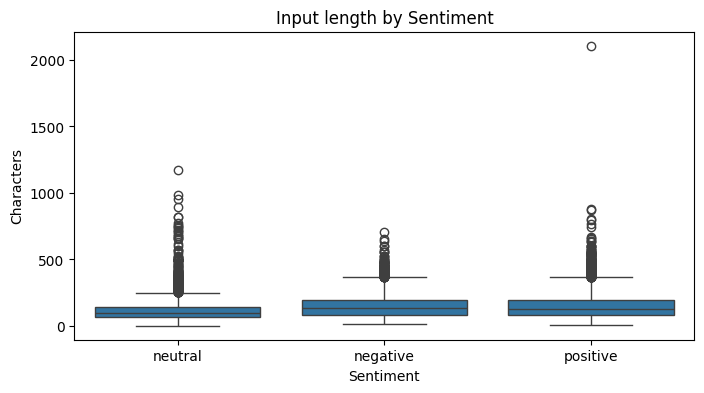

In [5]:
## standard descriptive statistics
import matplotlib.pyplot as plt
import seaborn as sns
print("Categorical summaries:")
print(df_fingpt[["output","instruction"]].describe())

## Numeric summary on text length
df_fingpt["length"] = df_fingpt["input"].str.len()
print("\nText‐length descriptive statistics:")
print(df_fingpt["length"].describe())

## Visualize length by sentiment
plt.figure(figsize=(8,4))
sns.boxplot(x="output", y="length", data=df_fingpt)
plt.title("Input length by Sentiment")
plt.ylabel("Characters"); plt.xlabel("Sentiment")
plt.show()

In [6]:
# taking a look at the first few rows of each type of questions in the instruction column
pd.set_option('display.max_colwidth', 200)

for instr in df_fingpt["instruction"].unique():
    print(f"Instruction: {instr}")
    print(df_fingpt[df_fingpt["instruction"] == instr].head(5))
    print("-" * 20)

Instruction: What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.
                                                                                                                                                                                                      input  \
0   Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...   
1                                                                                                                                                 Sanofi poaches AstraZeneca scientist as new research head   
5                                                                                                                      The Finnish company Stockmann has signed the contract with the company Technopolis .   
9                                                                

In [7]:
# Text length analysis for English dataset
fingpt_text_lengths = [len(text) for text in df_fingpt["input"]]
print("English text length stats:")
print(pd.Series(fingpt_text_lengths).describe())

# Flag extremely short or long texts
short_threshold = 10 
long_threshold = 1000
print("\nPotential outliers in English dataset:")
print(f"Very short texts (<{short_threshold} chars): {sum(1 for l in fingpt_text_lengths if l < short_threshold)}")
print(f"Very long texts (>{long_threshold} chars): {sum(1 for l in fingpt_text_lengths if l > long_threshold)}")

English text length stats:
count    30235.000000
mean       135.434397
std         84.076006
min          2.000000
25%         75.000000
50%        119.000000
75%        170.000000
max       2107.000000
dtype: float64

Potential outliers in English dataset:
Very short texts (<10 chars): 26
Very long texts (>1000 chars): 2


In [8]:
# Word count analysis
df_fingpt["word_count"] = df_fingpt["input"].str.split().apply(len)
print("\nWord count descriptive statistics:")
print(df_fingpt["word_count"].describe())


Word count descriptive statistics:
count    30235.000000
mean        21.483281
std         13.564992
min          1.000000
25%         12.000000
50%         18.000000
75%         28.000000
max        303.000000
Name: word_count, dtype: float64


In [9]:
df_fingpt.head()

print("NaNs: ", df_fingpt.isna().sum())

NaNs:  input          0
output         0
instruction    0
length         0
word_count     0
dtype: int64


In [10]:
import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grasshead/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# term frequency analysis
## preprocess to lowercase, remove punctuation, remove stopwords
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('[^a-z A-Z 0-9-]+', '', text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df_fingpt["input_cleaned"] = df_fingpt["input"].apply(preprocess_text)
df_fingpt.head()

,input,output,instruction,length,word_count,input_cleaned
0,"Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...",neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,225,40,teollisuuden voima oyj finnish utility known tvo said shortlisted mitsubishi heavy eu-apwr model along reactors areva toshiba corp ge hitachi nuclear energy korea hydro nuclear power co
1,Sanofi poaches AstraZeneca scientist as new research head,neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,57,8,sanofi poaches astrazeneca scientist new research head
2,Starbucks says the workers violated safety policies while workers said they'd never heard of the policy before and are alleging retaliation.,negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,140,21,starbucks says workers violated safety policies workers said theyd never heard policy alleging retaliation
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.,29,4,brcm raises revenue forecast
4,"Google parent Alphabet Inc. reported revenue and earnings that fell short of analysts' expectations, showing the company's search advertising juggernaut was not immune to a slowdown in the digital...",negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,237,37,google parentalphabet increported revenue earnings fell short analysts expectations showing companys search advertising juggernaut immune slowdown digital ad market shares fell 6


In [12]:
def corpus(text):
    text_list = text.split()
    return text_list

df_fingpt["input_words_list"] = df_fingpt["input_cleaned"].apply(corpus)
df_fingpt.head()

,input,output,instruction,length,word_count,input_cleaned,input_words_list
0,"Teollisuuden Voima Oyj , the Finnish utility known as TVO , said it shortlisted Mitsubishi Heavy s EU-APWR model along with reactors from Areva , Toshiba Corp. , GE Hitachi Nuclear Energy and Kore...",neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,225,40,teollisuuden voima oyj finnish utility known tvo said shortlisted mitsubishi heavy eu-apwr model along reactors areva toshiba corp ge hitachi nuclear energy korea hydro nuclear power co,"[teollisuuden, voima, oyj, finnish, utility, known, tvo, said, shortlisted, mitsubishi, heavy, eu-apwr, model, along, reactors, areva, toshiba, corp, ge, hitachi, nuclear, energy, korea, hydro, nu..."
1,Sanofi poaches AstraZeneca scientist as new research head,neutral,What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}.,57,8,sanofi poaches astrazeneca scientist new research head,"[sanofi, poaches, astrazeneca, scientist, new, research, head]"
2,Starbucks says the workers violated safety policies while workers said they'd never heard of the policy before and are alleging retaliation.,negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,140,21,starbucks says workers violated safety policies workers said theyd never heard policy alleging retaliation,"[starbucks, says, workers, violated, safety, policies, workers, said, theyd, never, heard, policy, alleging, retaliation]"
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please choose an answer from {negative/neutral/positive}.,29,4,brcm raises revenue forecast,"[brcm, raises, revenue, forecast]"
4,"Google parent Alphabet Inc. reported revenue and earnings that fell short of analysts' expectations, showing the company's search advertising juggernaut was not immune to a slowdown in the digital...",negative,What is the sentiment of this news? Please choose an answer from {strong negative/moderately negative/mildly negative/neutral/mildly positive/moderately positive/strong positive}.,237,37,google parentalphabet increported revenue earnings fell short analysts expectations showing companys search advertising juggernaut immune slowdown digital ad market shares fell 6,"[google, parentalphabet, increported, revenue, earnings, fell, short, analysts, expectations, showing, companys, search, advertising, juggernaut, immune, slowdown, digital, ad, market, shares, fel..."


In [13]:
from tqdm import trange

corpus = []

df_fingpt.reset_index(drop=True, inplace=True)

for i in trange(df_fingpt.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_fingpt['input_words_list'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30235/30235 [00:00<00:00, 625890.39it/s]


430921

In [14]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)
mostCommon

[('stock', 3962),
 ('stocks', 2871),
 ('company', 2443),
 ('-', 2348),
 ('market', 2284),
 ('inc', 2206),
 ('earnings', 2028),
 ('new', 2014),
 ('apple', 1980),
 ('investors', 1705)]

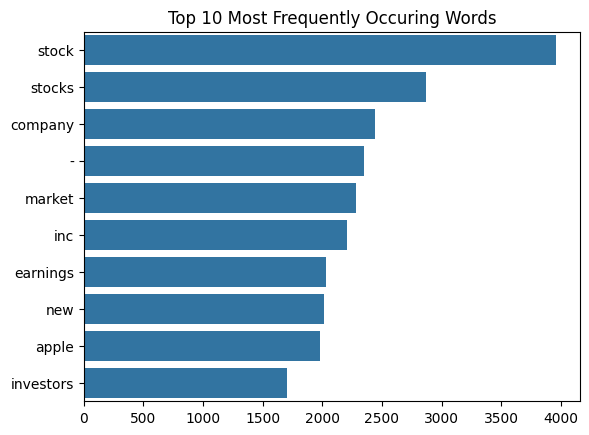

In [15]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

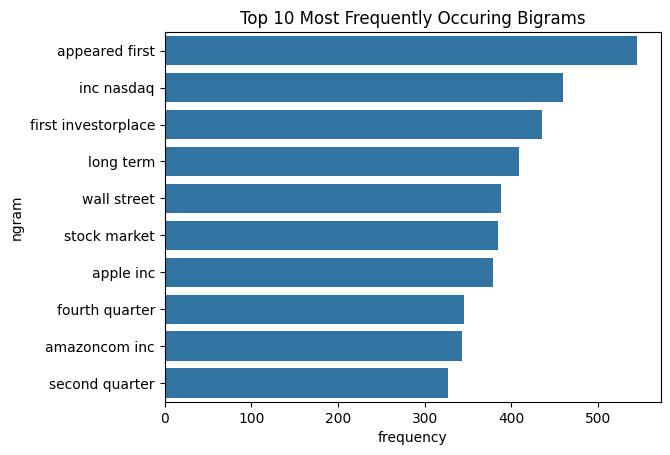

In [16]:
# Most frequent n-grams
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_fingpt['input_cleaned'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

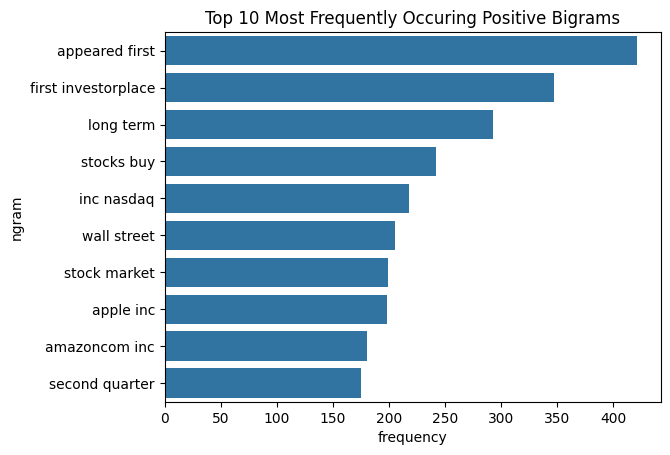

In [22]:
# most frequent positive n-grams
positive_bigrams = cv.fit_transform(df_fingpt[df_fingpt['output'] == 'positive']['input_cleaned'])

count_values_positive = positive_bigrams.toarray().sum(axis=0)
ngram_freq_positive = pd.DataFrame(sorted([(count_values_positive[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq_positive.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq_positive['frequency'][:10], y=ngram_freq_positive['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Positive Bigrams')
plt.show()

In [ ]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_fingpt['input_cleaned'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

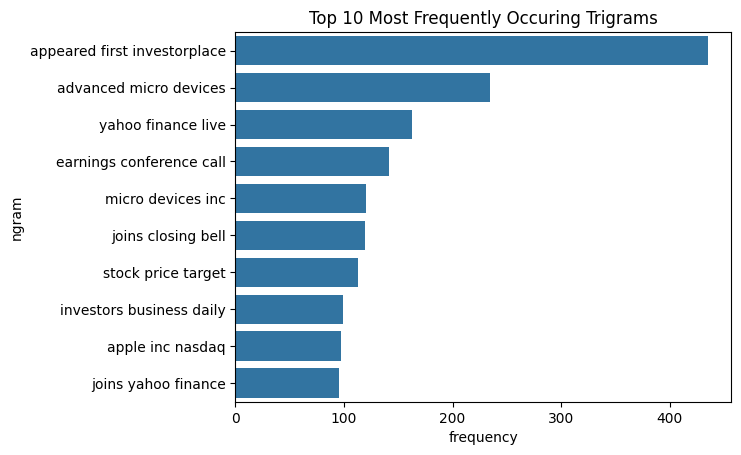

In [18]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

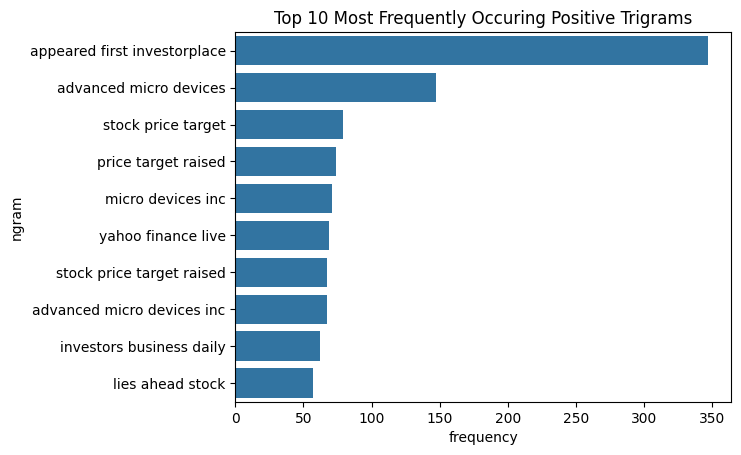

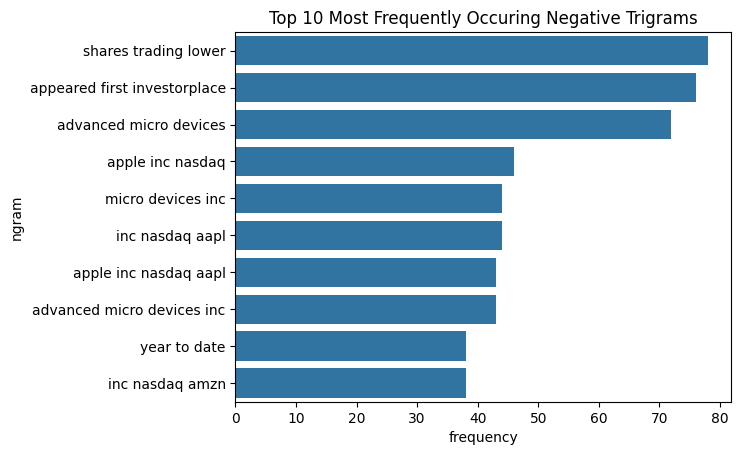

In [26]:
cv_range = CountVectorizer(ngram_range=(3,5))
positive_trigrams = cv_range.fit_transform(df_fingpt[df_fingpt['output'] == 'positive']['input_cleaned'])
count_values_positive = positive_trigrams.toarray().sum(axis=0)
ngram_freq_positive = pd.DataFrame(sorted([(count_values_positive[i], k) for k, i in cv_range.vocabulary_.items()], reverse = True))
ngram_freq_positive.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq_positive['frequency'][:10], y=ngram_freq_positive['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Positive Trigrams')
plt.show()

negative_trigrams = cv_range.fit_transform(df_fingpt[df_fingpt['output'] == 'negative']['input_cleaned'])
count_values_negative = negative_trigrams.toarray().sum(axis=0)
ngram_freq_negative = pd.DataFrame(sorted([(count_values_negative[i], k) for k, i in cv_range.vocabulary_.items()], reverse = True))
ngram_freq_negative.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq_negative['frequency'][:10], y=ngram_freq_negative['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Negative Trigrams')
plt.show()

In [19]:
# Choose 3000 samples for training randomly, keeping 30 of each outliers (both short and long texts)
short_threshold = 30
long_threshold = 500
negative_normal_samples = df_fingpt[(df_fingpt["output"] == "negative") 
                                    & df_fingpt["length"].between(short_threshold, long_threshold)].sample(n = 980, random_state=13)
positive_normal_samples = df_fingpt[(df_fingpt["output"] == "positive") 
                                    & df_fingpt["length"].between(short_threshold, long_threshold)].sample(n = 980, random_state=13)
neutral_normal_samples = df_fingpt[(df_fingpt["output"] == "neutral") 
                                   & df_fingpt["length"].between(short_threshold, long_threshold)].sample(n = 980, random_state=13)

# Add 10 long outliers from each category from the original dataset minus the normal samples
negative_long_outliers = df_fingpt[(df_fingpt["output"] == "negative") 
                                   & (df_fingpt["length"] > long_threshold)].sample(n=10, random_state=13)
positive_long_outliers = df_fingpt[(df_fingpt["output"] == "positive") 
                                   & (df_fingpt["length"] > long_threshold)].sample(n=10, random_state=13)
neutral_long_outliers = df_fingpt[(df_fingpt["output"] == "neutral") 
                                  & (df_fingpt["length"] > long_threshold)].sample(n=10, random_state=13)

# Add 10 short outliers from each category from the original dataset minus the normal samples
negative_short_outliers = df_fingpt[(df_fingpt["output"] == "negative") 
                                    & (df_fingpt["length"] < short_threshold)].sample(n=10, random_state=13)
positive_short_outliers = df_fingpt[(df_fingpt["output"] == "positive") 
                                    & (df_fingpt["length"] < short_threshold)].sample(n=10, random_state=13)
neutral_short_outliers = df_fingpt[(df_fingpt["output"] == "neutral") 
                                   & (df_fingpt["length"] < short_threshold)].sample(n=10, random_state=13)

# Combine all samples
train_samples = pd.concat([
    negative_normal_samples, positive_normal_samples, neutral_normal_samples,
    negative_long_outliers, positive_long_outliers, neutral_long_outliers,
    negative_short_outliers, positive_short_outliers, neutral_short_outliers
])
# Shuffle the combined samples
train_samples = train_samples.sample(frac=1, random_state=13).reset_index(drop=True)

# Save the final training dataset
train_samples.to_csv("data/fingpt_train_samples.csv", index=False, encoding='utf-8-sig')

In [ ]:
# choose another 250 samples for validation, keeping 5 of each outliers (both short and long texts)

training_indices = train_samples.index

# Get all English samples not used in training
remaining_samples = df_fingpt[~df_fingpt.index.isin(training_indices)]

# 1. Normal samples (no outliers) - stratified by sentiment
negative_normal_val = remaining_samples[(remaining_samples["output"] == "negative") & 
                                     remaining_samples["length"].between(short_threshold, long_threshold)].sample(
                                     n=77, random_state=42)

neutral_normal_val = remaining_samples[(remaining_samples["output"] == "neutral") & 
                                    remaining_samples["length"].between(short_threshold, long_threshold)].sample(
                                    n=77, random_state=42)

positive_normal_val = remaining_samples[(remaining_samples["output"] == "positive") & 
                                     remaining_samples["length"].between(short_threshold, long_threshold)].sample(
                                     n=78, random_state=42)

# 2. Short outliers - 3 for each sentiment
negative_short_val = remaining_samples[(remaining_samples["output"] == "negative") & 
                                    (remaining_samples["length"] < short_threshold)].sample(
                                    n=min(3, sum((remaining_samples["output"] == "negative") & 
                                               (remaining_samples["length"] < short_threshold))), 
                                    random_state=42)

neutral_short_val = remaining_samples[(remaining_samples["output"] == "neutral") & 
                                   (remaining_samples["length"] < short_threshold)].sample(
                                   n=min(3, sum((remaining_samples["output"] == "neutral") & 
                                              (remaining_samples["length"] < short_threshold))), 
                                   random_state=42)

positive_short_val = remaining_samples[(remaining_samples["output"] == "positive") & 
                                    (remaining_samples["length"] < short_threshold)].sample(
                                    n=min(3, sum((remaining_samples["output"] == "positive") & 
                                               (remaining_samples["length"] < short_threshold))), 
                                    random_state=42)

# 3. Long outliers - 3 for each sentiment
negative_long_val = remaining_samples[(remaining_samples["output"] == "negative") & 
                                   (remaining_samples["length"] > long_threshold)].sample(
                                   n=min(3, sum((remaining_samples["output"] == "negative") & 
                                              (remaining_samples["length"] > long_threshold))), 
                                   random_state=42)

neutral_long_val = remaining_samples[(remaining_samples["output"] == "neutral") & 
                                  (remaining_samples["length"] > long_threshold)].sample(
                                  n=min(3, sum((remaining_samples["output"] == "neutral") & 
                                             (remaining_samples["length"] > long_threshold))), 
                                  random_state=42)

positive_long_val = remaining_samples[(remaining_samples["output"] == "positive") & 
                                   (remaining_samples["length"] > long_threshold)].sample(
                                   n=min(3, sum((remaining_samples["output"] == "positive") & 
                                              (remaining_samples["length"] > long_threshold))), 
                                   random_state=42)

# Combine validation samples
validation_samples = pd.concat([
    negative_normal_val, neutral_normal_val, positive_normal_val,
    negative_short_val, neutral_short_val, positive_short_val,
    negative_long_val, neutral_long_val, positive_long_val
])

# Shuffle the validation samples
validation_samples = validation_samples.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify distribution
print(f"Total validation samples: {len(validation_samples)}")
print(f"Validation sentiment distribution:\n{validation_samples['output'].value_counts()}")
print(f"Short outliers: {sum(validation_samples['length'] < short_threshold)}")
print(f"Long outliers: {sum(validation_samples['length'] > long_threshold)}")

# Save the validation dataset
validation_samples.to_csv("../data/fingpt_validation_samples.csv", index=False, encoding='utf-8-sig')


Total validation samples: 250
Validation sentiment distribution:
output
positive    84
neutral     83
negative    83
Name: count, dtype: int64
Short outliers: 9
Long outliers: 9


### Findings
1. Data set seems to have a large amount of duplicates but no missing values.
2. Data set seems to be split into 3 distinct questions asked, two of which is attempting to split the output into 3 categories which the last one splits it into 7 categories. 
3. After cleaning, there is now a less balanced dataset(10362 neutral making it rather dominant, 210-220 strong negative and positive making them underrepresented)
4. The are not a lot of outliers, and in general the dataset is about a sentence or two with the occasional outliers. The dataset seems to be right-skewed as seen by the mean being more than the median.
5. Different instruction template especially with the varying sentiment granularity can cause unclear or biased objectives during training depending on how it is handled.
6. The several imbalance in class may cause insufficient representation in the other sentiments
7. some samples may not provide enough context along with it as the sentence length of the dataset is generally on the shorter side
